#1. 1주차

## networkx를 이용한 실습


`%`시작 명령어:  "magic"명령어, Jupyter notebook용. `%matplotlib inline`은 그래픽을 바로 보여지도록 지정함

In [ ]:
import networkx as nx
%matplotlib inline

## 방향성없는 그래프 그리기: Undirected graph ***

In [ ]:
# undirected graph
G = nx.Graph()
# 노드 a 추가
G.add_node('a')
# 리스트와 같은 시퀀스의 원소들을 노드로 추가
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)
G.nodes

NodeView(('a', 'b', 'c', 'd'))

In [ ]:
# 노드 간 엣지 추가: undirected는 순서 중요하지 않음
G.add_edge('a', 'z')

# 튜플로 정의된 엣지의 리스트로 추가
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)


In [ ]:
# 그래프 그리기
nx.draw(G, with_labels=True)

- draw 함수의 설정 xxx

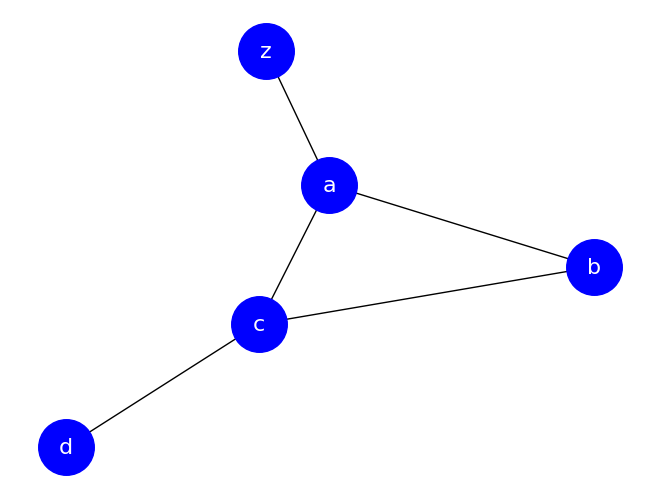

In [ ]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

## Graph methods
- 생성된 그래프의 메소드(함수)

In [ ]:
# 노드 출력
G.nodes

NodeView(('a', 'b', 'c', 'd', 'z'))

In [ ]:
# 엣지 출력
G.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

- 위의 결과에는 반복문 사용 가능

In [ ]:
for node in G.nodes:
    print(node)

a
b
c
d
z


In [ ]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'z')
('a', 'c')
('b', 'c')
('c', 'd')


- 노드와 엣지의 수 파악

In [ ]:
G.number_of_nodes()

5

In [ ]:
G.number_of_edges()

5

`.neighbors()` method: 주어진 노드의 이웃을 발견 **

In [ ]:
G.neighbors('b')

In [ ]:
list(G.neighbors('b'))

['a', 'c']

- 반복문으로 확인

In [ ]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


## NetworkX functions vs. Graph methods


In [ ]:
nx.is_tree(G)

False

In [ ]:
nx.is_connected(G)

True

- Node and edge existence 체크

In [ ]:
G.has_node('a')

True

In [ ]:
G.has_node('x')

False

- in 연산자를 활용한 노드 포함여부 확인

In [ ]:
'd' in G.nodes

True

- 엣지 확인

In [ ]:
G.has_edge('a', 'b')

True

In [ ]:
G.has_edge('a', 'd')

False

In [ ]:
('c', 'd') in G.edges

True

- 다양한 종류의 그래프

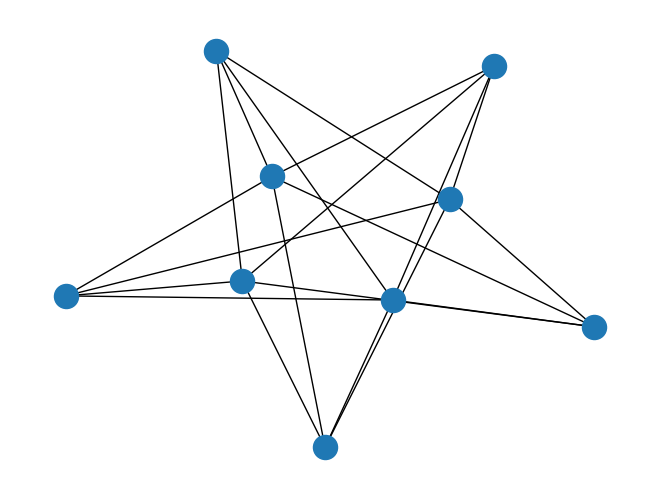

In [ ]:
B = nx.complete_bipartite_graph(4,5)
nx.draw(B)

In [ ]:
C = nx.cycle_graph(4)
nx.draw(C)

In [ ]:
P = nx.path_graph(5)
nx.draw(P)

In [ ]:
S = nx.star_graph(6)
nx.draw(S)

- density와 Sparsity ***

In [ ]:
G.number_of_nodes()
G.number_of_edges()

5

In [ ]:
nx.density(G)

0.5

In [ ]:
nx.density(B)

0.5555555555555556

In [ ]:
CG = nx.complete_graph(100)
nx.density(CG)

1.0

In [ ]:
clique = nx.subgraph(CG, (0,1,2))
nx.density(clique)

1.0

## Node degree
- 얼마나 많은 다른 노드와 연결되었는지를 확인
-  `.neighbors()` 결과의 개수

In [ ]:
len(list(G.neighbors('a')))
list(G.neighbors('a'))

['b', 'z', 'c']

- 위와 동일한, a노드의 연결정도 ***?


In [ ]:
G.degree('a')

3

- NetworkX에 응용

In [ ]:
print(G.nodes())

[G.degree(n) for n in G.nodes()]

#각 노드의 이웃들의 리스트를 갖는 리스트를 출력하세요.
[list(G.neighbors(n)) for n in G.nodes()]


['a', 'b', 'c', 'd', 'z']


[['b', 'z', 'c'], ['a', 'c'], ['a', 'b', 'd'], ['c'], ['a']]

- Node 이름 정하기

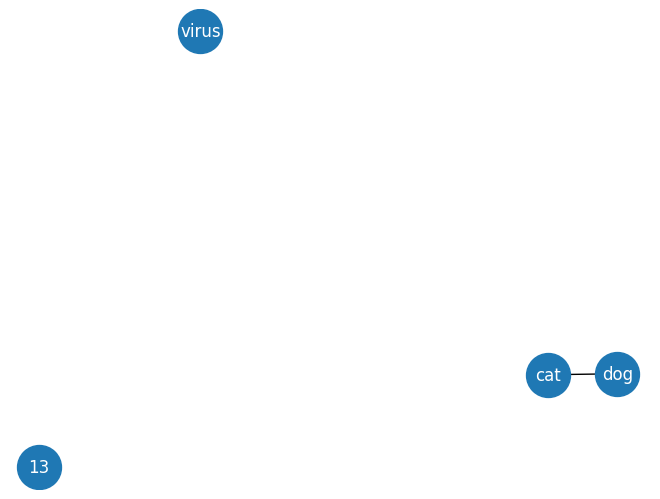

In [ ]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

- Adjacency lists란? ***?

```
a d e
b c
c
d
e
```
 - 이 때 엣지의 생성:
```
(a, d)
(a, e)
(b, c)
```
 - 예: `friends.adjlist`

In [ ]:
print(open('friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



-  `nx.read_adjlist()`를 활용하여 읽기

In [ ]:
SG = nx.read_adjlist('friends.adjlist')

In [ ]:
SG.edges()

EdgeView([('George', 'Frank'), ('George', 'Dennis'), ('Frank', 'Claire'), ('Frank', 'Alice'), ('Dennis', 'Claire'), ('Dennis', 'Esther'), ('Claire', 'Alice'), ('Claire', 'Esther'), ('Alice', 'Bob')])

In [ ]:
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True)

In [ ]:
SG.degree('Alice')

3

## Directed graphs ***

- 방향성 있는 그래프
- `DiGraph` 객체

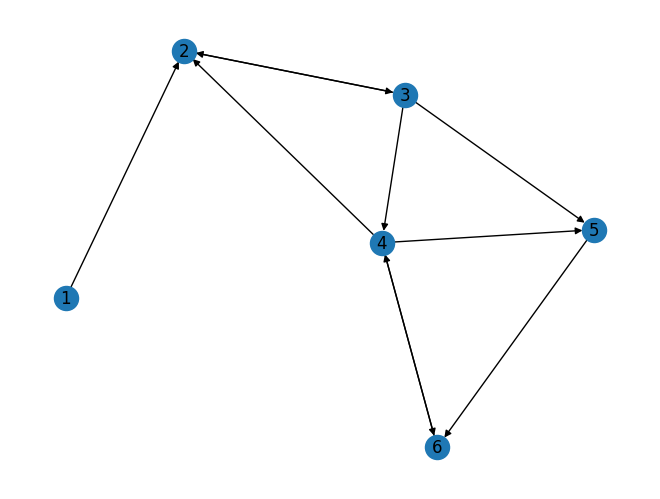

In [ ]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

In [ ]:
D.has_edge(1,2)

True

In [ ]:
D.has_edge(2,1)

False

- degree도 in-degree, out-degree를 구분 ***

In [ ]:
D.in_degree(2)

3

In [ ]:
D.out_degree(2)

1

- 방향성있는 그래프에서 `neighbors` method는 `successors`와 동일

In [ ]:
D.degree(2)

4

In [ ]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]


#2. 2주차

## 1. Path

In [ ]:
import networkx as nx
%matplotlib inline

- simple, undirected network

In [ ]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)

*path*: a sequence of edges connecting two nodes ***
- 예: nodes 3과 4를 연결하는 경로

In [ ]:
nx.has_path(G, 3, 4)

True

- 두 노드 사이는 하나 이상의 경로

In [ ]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

- Cycle을 허용하지 않는 경우 simple path
- Shortest Path란?
 - unweighted network: 적은 수의 링크를 의미

In [ ]:
nx.shortest_path(G, 1, 4)

[1, 4]

- path length

In [ ]:
nx.shortest_path_length(G, 1, 4)

1

- path length: 링크의 수가 결정, 노드의 수는 관여안함
 - 노드 $u$와 $v$에 대한 최단 경로 길이

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1


## 2. Connected components
- Connected Graph: 모든 노드 쌍이 경로로 연결

In [ ]:
nx.is_connected(G)

True

- disconnected

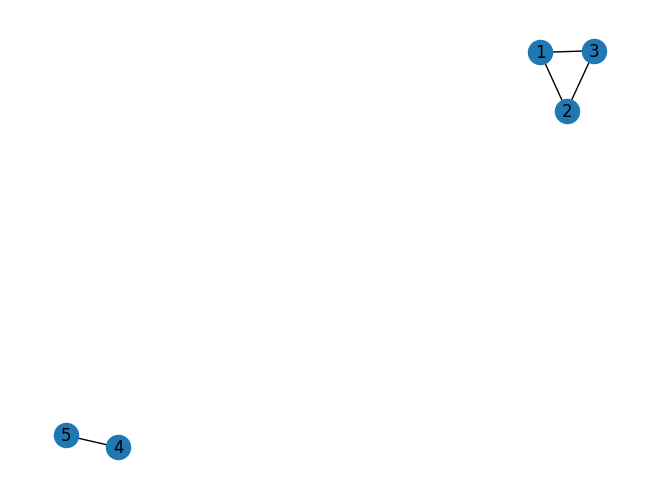

In [ ]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)

In [ ]:
nx.is_connected(G)

False

- 네트워크 내 연결되지 않은 노드 사이 경로: 오류 발생

In [ ]:
nx.has_path(G, 3, 5)

False

In [ ]:
nx.shortest_path(G, 3, 5)

NetworkXNoPath: No path between 3 and 5.

- Connected Components의 수

In [ ]:
nx.number_connected_components(G)

2

In [ ]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

In [ ]:
components = list(nx.connected_components(G))
len(components[0])

3

In [ ]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

- 노드만 전달하여 Sub graph 구성

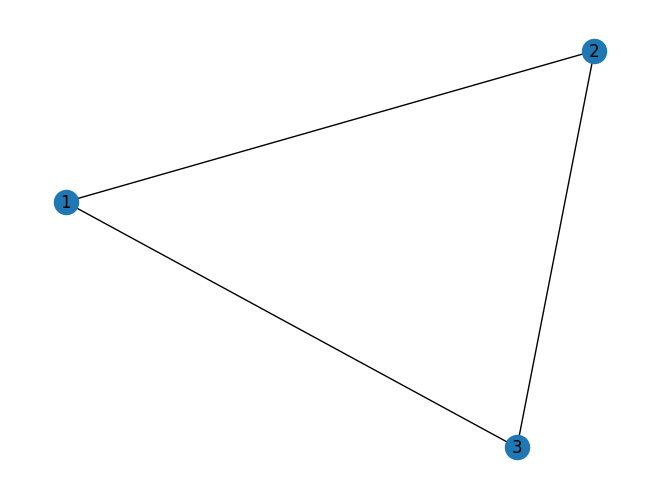

In [ ]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)

- 또는 `nx.connected_component_subgraphs()`사용

## 3. Directed paths & components

- 유향 그래프에서의 적용

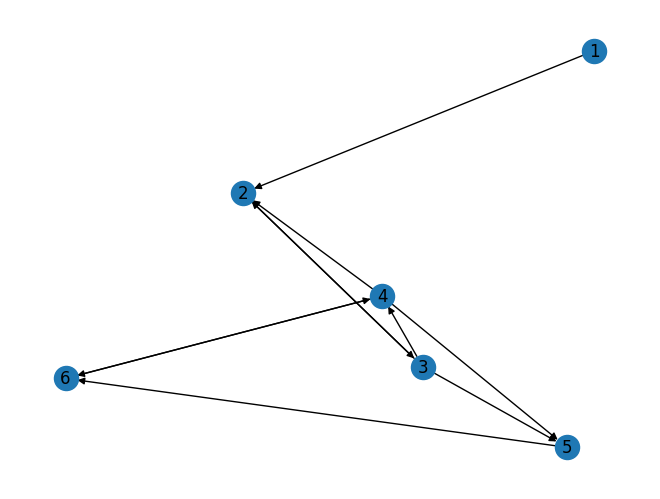

In [ ]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

- Directed paths의 비대칭성: 노드 $u$에서 노드 $v$로의 경로가 반대 방향을 의미하지 않을 수 있음

In [ ]:
nx.has_path(D, 1, 4)

True

In [ ]:
nx.has_path(D, 4, 1)

False

- 최단 경로 발견

In [ ]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [ ]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

- Directed components

 - 유향 그래프
  - *Strongly connected*: 모든 노드 쌍 사이에 Directed path

In [ ]:
nx.is_strongly_connected(D)

False

 - *Weakly connected* : 모든 노드 사이에 path 존재(undirected)

In [ ]:
nx.is_weakly_connected(D)

True

In [ ]:
# This will raise an error
nx.is_connected(D)

NetworkXNotImplemented: not implemented for directed type

In [ ]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [ ]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

## 4. US air traffic network 연습

In [ ]:
G = nx.read_graphml('openflights_usa.graphml.gz')

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
G.nodes['BMI']

{'name': 'Central Illinois Regional Airport at Bloomington-Normal',
 'latitude': 40.47710037,
 'longitude': -88.91590118,
 'IATA': 'BMI'}

In [ ]:
G.nodes['IND']['name']

'Indianapolis International Airport'

In [ ]:
nx.shortest_path(G, 'IND', 'SFO')

['IND', 'SFO']

## 5. Small World


In [ ]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import powerlaw
warnings.filterwarnings('ignore')

- Watts-Strogatz (small world) graphs: large clustering coefficient,  short distances

- regular lattice (p=0)

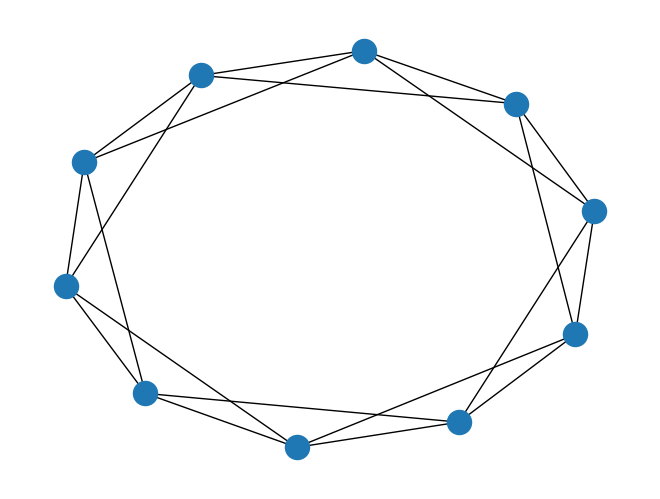

In [ ]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(10, k=4, p=0)
nx.draw(ws)

In [ ]:
print(f"Global clustering: {nx.average_clustering(ws)}")

Global clustering: 0.5


In [ ]:
print(f"Average shortest path: {nx.average_shortest_path_length(ws)}")

Average shortest path: 1.6666666666666667


- random netwroks (p=1)..

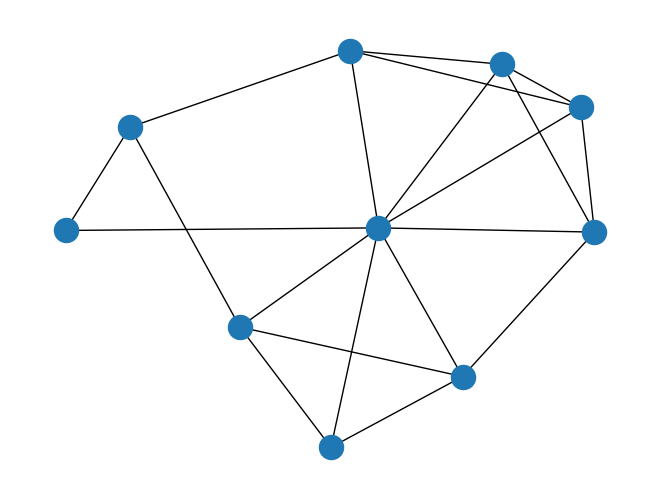

In [ ]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(10, k=4, p=1)
nx.draw(ws)

In [ ]:
print(f"Global clustering: {nx.average_clustering(ws)}")

Global clustering: 0.5321428571428573


In [ ]:
print(f"Average shortest path: {nx.average_shortest_path_length(ws)}")

Average shortest path: 1.5777777777777777


## Importing the library
As a first step just import the ``networkx`` library.

In [ ]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

- Erdos-Renyi (random) graphs: N개 노드와 각 노드의 쌍이 모두 p의 확률로 연결된 랜덤 그래프

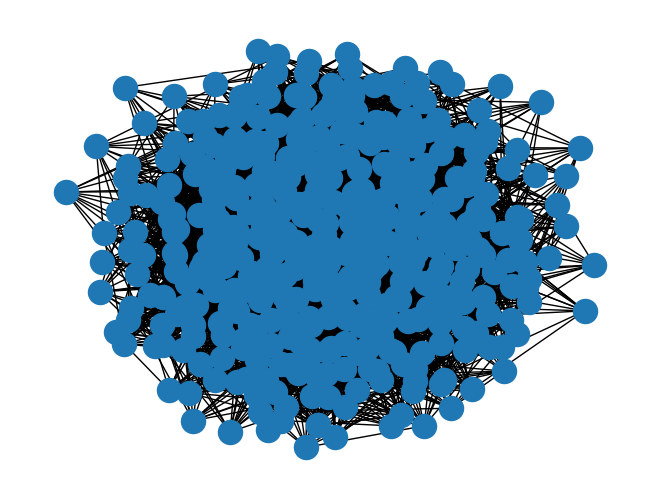

In [ ]:
# network generators 1 (random graphs)
er = nx.erdos_renyi_graph(400, 0.05)
nx.draw(er)

ER degree distribution

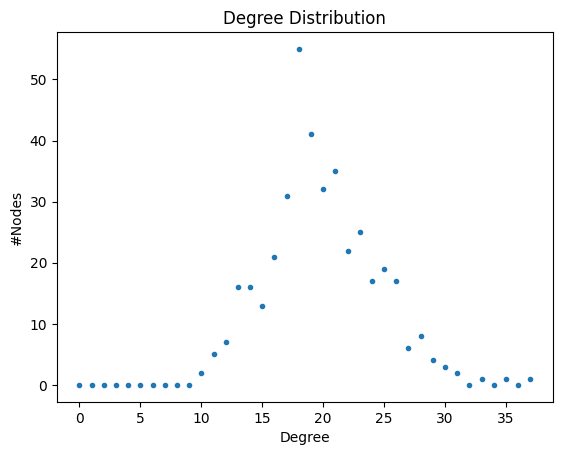

In [ ]:
hist = nx.degree_histogram(er)

plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

#3. 5회차

##1. Bridge와 Overlap

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- 예제 데이터 읽기: Game of Thrones edge data

In [ ]:
g = nx.Graph()
data = pd.read_csv("got-s6-edges.csv")

for i in np.arange(data.shape[0]):
   g.add_edge(data.iloc[i, 0], data.iloc[i, 1], weight=int(data.iloc[i, 2]))

g.edges

- Bridges and Local Bridges
 - local bridge: edge의 노드들이 더 이상 Common neighborhood가 없는 경우를 의미

 - bridge 체크

In [ ]:
nx.has_bridges(g)

True

 - 모든 bridge 확인

In [ ]:
list(nx.bridges(g))

[('JON', 'SAM'),
 ('JON', 'JEOR'),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ'),
 ('TYRION', 'AERYS'),
 ('DAVOS', 'SHIREEN'),
 ('SAM', 'MAESTER_AEMON'),
 ('CERSEI', 'MOUNTAIN'),
 ('TORMUND', 'MANCE'),
 ('HOUND', 'GATINS'),
 ('BRYNDEN', 'MINISA'),
 ('EDMURE', 'HOSTER'),
 ('QYBURN', 'ARTHUR_CHILD'),
 ('NED', 'RICKARD_STARK')]

 - local bridges와 span 계산: Span은 local bridge의 연결된 두 노드 사이에서, 해당 연결이 제거될 때의 shortest path length

In [ ]:
list(nx.local_bridges(g, with_span=True))

[('JON', 'SAM', inf),
 ('JON', 'JEOR', inf),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ', inf),
 ('TYRION', 'AERYS', inf),
 ('VARYS', 'STANNIS', 3),
 ('ARYA', 'WALDER', 3),
 ('DAVOS', 'SHIREEN', inf),
 ('SAM', 'MAESTER_AEMON', inf),
 ('CERSEI', 'MOUNTAIN', inf),
 ('TORMUND', 'MANCE', inf),
 ('HOUND', 'GATINS', inf),
 ('BRYNDEN', 'MINISA', inf),
 ('EDMURE', 'HOSTER', inf),
 ('QYBURN', 'ARTHUR_CHILD', inf),
 ('NED', 'RICKARD_STARK', inf)]

- Tie Strength

 - 모든 노드의 pair에서 오버랩을 통한 Tie Strength측정

In [ ]:
def node_overlap(g):
    for u, v in g.edges():
        n_u = set(g.neighbors(u)) # set of u neighbors
        n_v = set(g.neighbors(v)) # set of v neighbors
        overlap = len(n_u & n_v) / len(n_u | n_v) # Neighborhood Overlap
        g[u][v]['overlap'] = overlap
    return g

In [ ]:
g = node_overlap(g)

- Neighborhood Overlap의 분포를 그리기

In [ ]:
g.edges(data=True)

In [ ]:
weights = [ e[-1]['overlap'] for e in g.edges(data=True) ]
weights

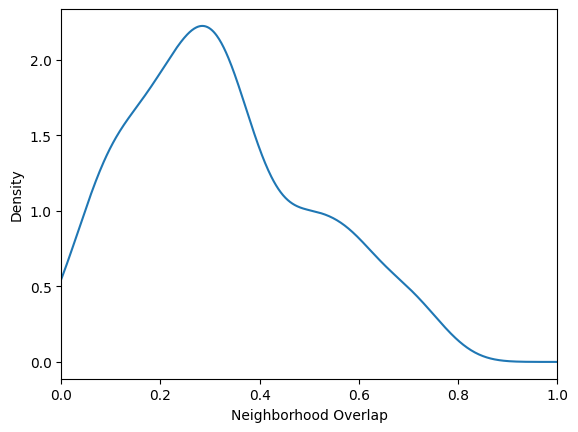

In [ ]:
pd.DataFrame(weights)[0].plot.kde()
plt.xlabel("Neighborhood Overlap")
plt.xlim(0,1)
plt.show()

##2. Network Resilience ***
- Random and Scale-free Network
- Reslience for both Networks (molloy_reed  활용)
- 그래프 복원력을 Plot:Random Failure, Targeted Attacks

- 랜덤 네트워크: 노드의 Degree가 포아송 분포를 따르게 됨.
- Scale Free 네트워크: Power Law 분포, Hub가 존재하고 Degree가 높기 때문에 상당히 많은 노드들과 연결



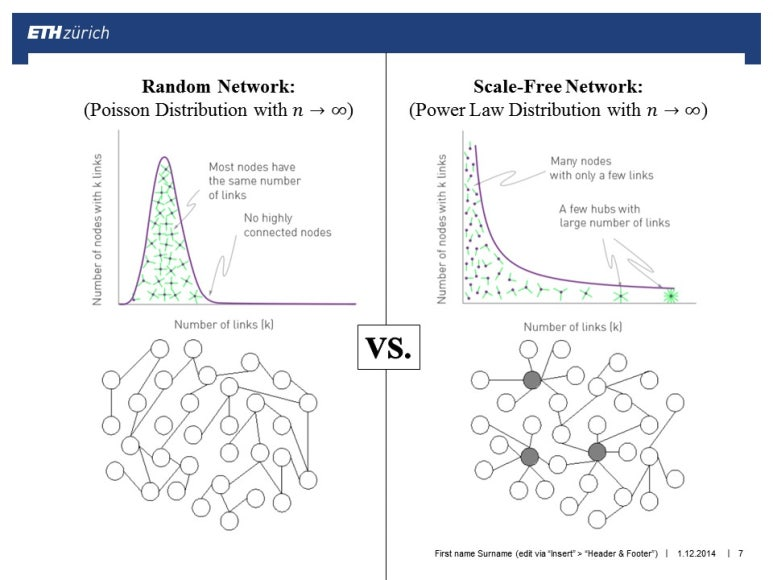

In [ ]:
# Random
er = nx.erdos_renyi_graph(1000, 0.001)
# Scale-free
ba = nx.barabasi_albert_graph(1000, 2)

-각 그래프에 대한 노드 Degree 계산

In [ ]:
er_degs = list(dict(er.degree()).values())
ba_degs = list(dict(ba.degree()).values())

- 네트워크 Resilience를 위해 Molloy-Reed threshold를 계산

In [ ]:
def molloy_reed(degrees):
    return (np.mean(degrees)*(np.mean(degrees)+1))/np.mean(degrees)

def breakdown_threshold(degrees):
    K = molloy_reed(degrees)
    return 1 - (1/(K-1))

- Random network

In [ ]:
molloy_reed(er_degs)

2.122

In [ ]:
breakdown_threshold(er_degs)

0.10873440285204983

- Scale-free network

In [ ]:
molloy_reed(ba_degs)

4.992

In [ ]:
breakdown_threshold(ba_degs)

0.7494989979959921

##4. Game of Throne 그래프에서의 Resilience 계산
### Random Failures

In [ ]:
def random_node(g): # 노드 랜덤하게 선택
    return [np.random.choice(g.nodes())]

def dismantle(g, function, **args): # 그래프에서 개수를 점점 늘려가며 노드를 제거
    total_nodes = g.number_of_nodes()
    removed_nodes = []
    components = []
    while len(g.nodes()) > 1:
        n = function(g, **args)[0]
        g.remove_node(n)
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)
        comps = list(nx.connected_components(g))
        g_size = 0
        if len(comps)>0:
            g_size  = max([len(c)for c in comps])/total_nodes
        components.append(g_size)
    return removed_nodes, components

def get_sorted_nodes(g, score, reverse=True): # 정렬
    nodes = score(g)
    if isinstance(nodes, dict):
        nodes = [(k, v) for k, v in nodes.items()]
    srt = sorted(nodes, key = lambda k: k[1], reverse = reverse)
    return [x[0] for x in srt]

def plot_dismantle(x, y):
    plt.plot(x, y)
    plt.xlabel("Removed Nodes")
    plt.ylabel("Giant Component size")
    plt.show()

- Random Failure:: 노드가 제거될 수록 Giant component 크기 감소

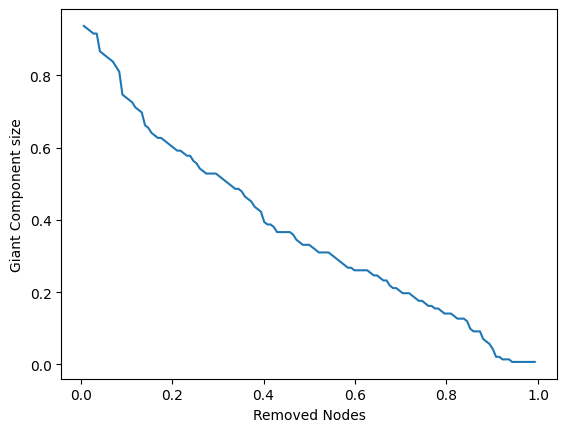

In [ ]:
h = g.copy()
rn, comps = dismantle(h, random_node)
plot_dismantle(rn, comps)

### Targeted Attacks

- Targeted Node attack: 허브부터 제거
- Giant component 크기가 급격히 감소

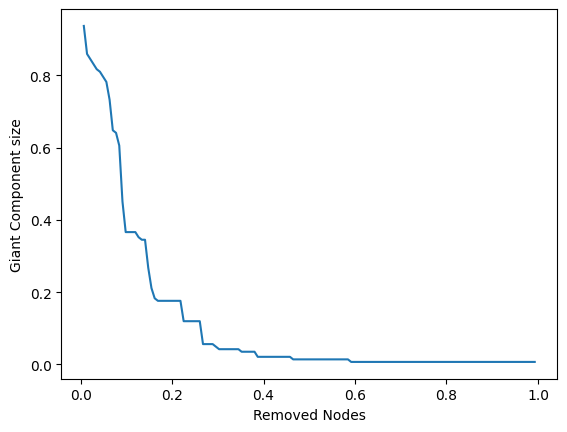

In [ ]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)
plot_dismantle(rn, comps)

- Targeted Edge Attack: 주요 에지 제거 (based on Edge Betweenness Centrality)


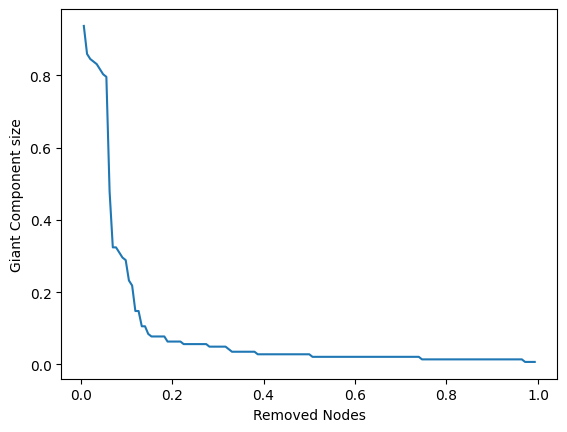

In [ ]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)
plot_dismantle(rn, comps)

# 필기

네트워크